# Sports Celebrity Image Classification: Data Cleaning

In [1]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import cv2

In [5]:
img = cv2.imread("./test/1234.jpg")

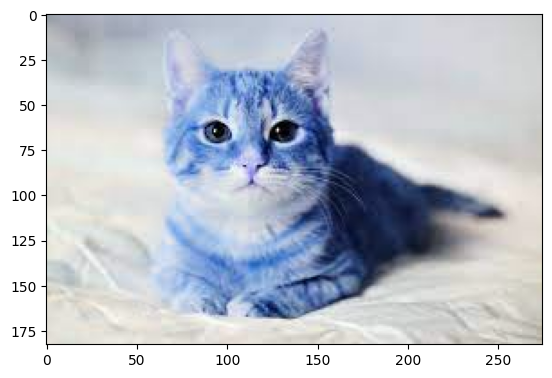

In [49]:
img1 = cv2.imread('./images/cat/download (1).jpg')
plt.imshow(img1)

In [6]:
img.shape

(1020, 780, 3)

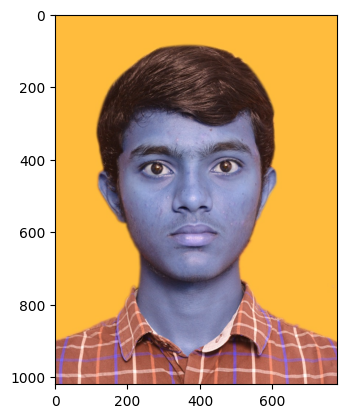

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1020, 780)

In [9]:
gray

array([[158, 158, 158, ..., 158, 158, 158],
       [158, 158, 158, ..., 158, 158, 158],
       [158, 158, 158, ..., 158, 158, 158],
       ...,
       [111, 113, 109, ..., 102, 106, 120],
       [110, 113, 110, ..., 101, 108, 124],
       [108, 111, 108, ..., 100, 110, 127]], dtype=uint8)

### It's Me 🥴

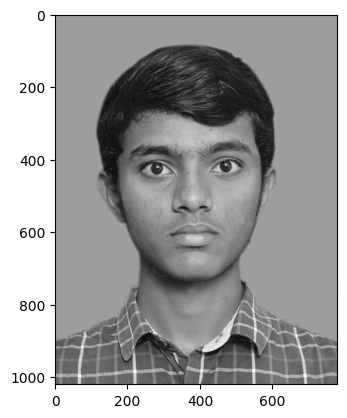

In [10]:
plt.imshow(gray, cmap='gray')

In [14]:
face_cascade = cv2.CascadeClassifier('./haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')

In [15]:
faces  = face_cascade.detectMultiScale(gray, 1.3, 5)

In [16]:
faces

array([[120, 217, 510, 510]])

In [17]:
(x,y,w,h) = faces[0]
x,y,w,h

(120, 217, 510, 510)

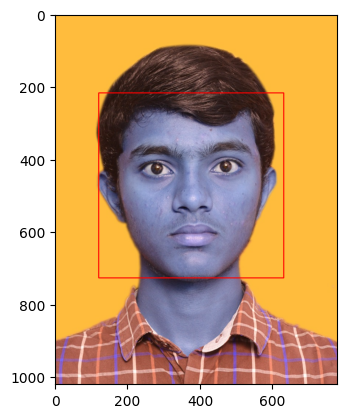

In [18]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

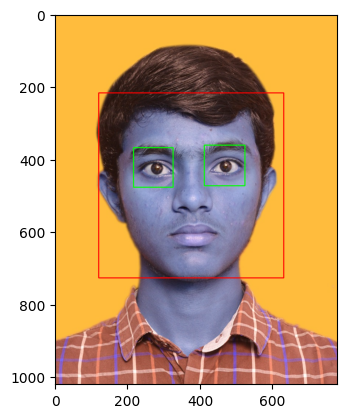

In [20]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

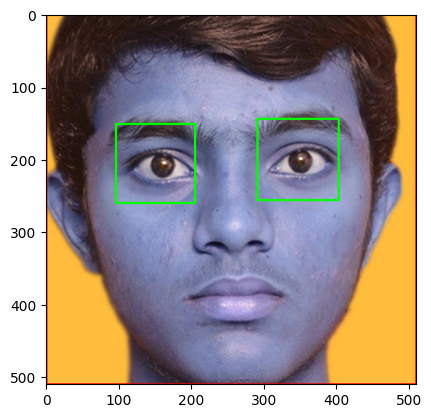

In [21]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [40]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

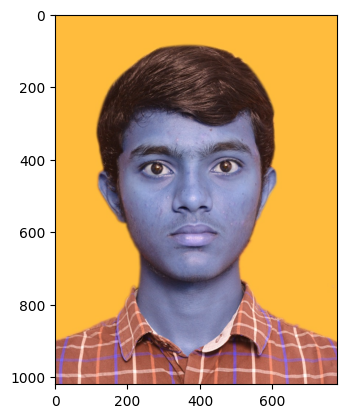

In [41]:
original_image = cv2.imread('./test/1234.jpg')
plt.imshow(original_image)

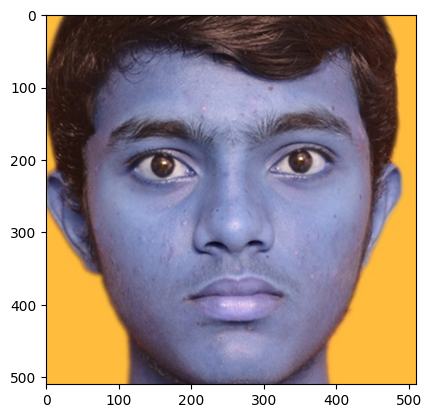

In [42]:
cropped_image = get_cropped_image_if_2_eyes('./test/1234.jpg')
plt.imshow(cropped_image)

In [50]:
path_to_data = "./images/"
path_to_cr_data = "./images/cropped/"

In [59]:
import os
import shutil

In [60]:
img_dirs = [entry.path for entry in os.scandir(path_to_data) if entry.is_dir()]

In [61]:
img_dirs

['./images/cat',
 './images/cropped',
 './images/lion',
 './images/tiger',
 './images/zebra']

In [73]:
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.mkdir(path_to_cr_data)


In [74]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cat
cropped
lion
tiger
zebra
